In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Importing Using Sklearn

In [ ]:
from sklearn import datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def skl_to_df(data_loader):
  x = pd.DataFrame(data_loader.data, columns = data_loader.feature_names)
  y = pd.Series(data_loader.target, name = 'target')
  return x, y

In [ ]:
x, y = skl_to_df(datasets.load_iris())

In [ ]:
x.shape

(150, 4)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [ ]:
y.head(1)

0    0
Name: target, dtype: int64

In [ ]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

In [ ]:
x_train.shape

(105, 4)

# Data Preprocessing

## Feature Normalization (Mean normalization & Feature Scaling)

In [ ]:
def calc_xmean(x):
  mean = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    mean[i] = np.mean(x[:, i])
  return mean

In [ ]:
xmean_train = calc_xmean(x_train)
xmean_train

array([5.84285714, 3.00952381, 3.87047619, 1.23904762])

In [ ]:
def calc_xstd(x):
  std = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    std[i] = np.std(x[:, 1])
  return std

In [ ]:
xstd_train = calc_xstd(x_train)
xstd_train

array([0.41691013, 0.41691013, 0.41691013, 0.41691013])

In [ ]:
def feature_norm(x, mean, std):
  for i in range(x.shape[1]):
    x[:, i] = (x[:, i] - mean[i])/std[i]
  return x

In [ ]:
x_train = feature_norm(x_train, xmean_train, xstd_train)
x_train

array([[-0.82237661, -1.46200287, -0.40890393, -0.57337925],
       [ 1.09650215, -0.50256349,  2.94913391,  0.62591998],
       [ 1.336362  ,  0.21701605,  3.90857329,  1.34549951],
       [ 1.81608169, -0.02284379,  1.27011499,  0.38606013],
       [ 3.25524076,  1.41631528,  5.34773236,  3.02451843],
       [-0.34265692, -0.26270364,  0.7903953 ,  0.14620029],
       [ 4.21468014, -0.02284379,  6.54703159,  2.06507905],
       [-0.58251677, -0.02284379,  1.50997484,  0.62591998],
       [-1.78181599,  1.17645543, -5.92568037, -2.49225801],
       [ 4.45453998, -0.50256349,  6.78689143,  1.8252192 ],
       [-0.10279708, -0.74242333,  0.55053545, -0.57337925],
       [-1.54195615,  0.93659559, -5.92568037, -2.49225801],
       [-2.02167584,  1.17645543, -6.16554021, -2.25239817],
       [-1.78181599,  1.89603497, -4.72638114, -2.01253832],
       [-2.02167584, -2.42144225, -0.88862362, -0.57337925],
       [ 1.09650215, -0.74242333,  2.46941422,  1.34549951],
       [-2.50139553,  0.

In [ ]:
x_test = feature_norm(x_test, xmean_train, xstd_train)
x_test

array([[ 0.61678246, -0.50256349,  1.98969453, -0.09365956],
       [-0.34265692,  1.89603497, -5.20610083, -2.25239817],
       [ 4.45453998, -0.98228318,  7.26661112,  2.54479874],
       [ 0.37692261, -0.26270364,  1.50997484,  0.62591998],
       [ 2.29580138, -0.50256349,  2.22955437,  0.38606013],
       [-1.06223646,  0.93659559, -5.68582052, -2.01253832],
       [-0.58251677, -0.26270364, -0.64876377,  0.14620029],
       [ 2.53566122,  0.21701605,  2.94913391,  2.54479874],
       [ 0.8566423 , -1.94172256,  1.50997484,  0.62591998],
       [-0.10279708, -0.74242333,  0.07081576, -0.09365956],
       [ 1.57622184,  0.4568759 ,  2.94913391,  1.8252192 ],
       [-2.50139553, -0.02284379, -5.92568037, -2.73211786],
       [-0.82237661,  1.17645543, -6.16554021, -2.49225801],
       [-2.26153568,  0.21701605, -5.68582052, -2.73211786],
       [-1.78181599,  1.89603497, -5.68582052, -2.25239817],
       [ 1.09650215,  0.69673574,  1.98969453,  0.86577982],
       [ 1.57622184, -0.

# Neural Network
We'll create a Neural Network with 1 hidden layer (5 neurons):
X -> 1HL -> Y

## Random Initialization

In [ ]:
def random_init(size_curr_l, size_prev_l):
  np.random.seed(4)
  w = np.random.randn(size_curr_l , size_prev_l) * np.sqrt(2/size_prev_l)        # He_Initialization
  b = np.zeros((1, size_curr_l))
  return w, b

In [ ]:
size_x = x_train.shape[1]
size_1 = 10
w1, b1 = random_init( size_1, size_x )
print(w1.shape)
print(b1.shape)

(10, 4)
(1, 10)


In [ ]:
size_2 = 3
w2, b2 = random_init( size_2, size_1 )
print(w2.shape)
print(b2.shape)

(3, 10)
(1, 3)


## Activation Functions

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def activation(input, w, b):
  a = sigmoid( np.dot(input, w.T) + b )
  return a

## 1-hot encoding of output

In [ ]:
def y_actual(y):
  m = len(y)
  y_actual = np.zeros((m, 3))
  for i in range(m):
    y_actual[i][y[i]] = 1
  return y_actual

In [ ]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
y_train_actual = y_actual(y_train)
y_train_actual

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [ ]:
y_test_actual = y_actual(y_test)
y_test_actual

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Compute Cost

In [ ]:
def compute_cost(Y, A2):
  m = len(Y)
  logprob1 = np.multiply(np.log(A2),Y)
  cost = - np.sum(logprob1)
  logprob2 = np.multiply(np.log(1-A2), (1-Y))
  cost -= np.sum(logprob2)
  cost /= m
  cost = float(np.squeeze(cost))
  return cost

## FWD PROP

In [ ]:
def fwd_prop(x, w1, b1, w2, b2):
  a1 = activation(x, w1, b1)
  a2 = activation(a1, w2, b2)
  return a1, a2

## Back Prop

In [ ]:
def back_prop(x, y, a1, a2, w1, b1, w2, b2, learning_rate):
  m = len(y)

  # back propagation steps
  dz2 = a2 - y
  dw2 = np.dot(dz2.T, a1)/m
  db2 = (np.sum(dz2, axis = 0, keepdims = True))/m

  dz1 = np.dot(dz2, w2) * (a1*(1-a1))
  dw1 = np.dot(dz1.T, x)/m
  db1 = (np.sum(dz1, axis = 0, keepdims = True))/m

  # update parameters
  w2 = w2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  w1 = w1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1

  return w1, b1, w2, b2

## Fitting on Training Data using Gradient Descent:

In [ ]:
alpha = 0.1
epochs = 100000
errors = []

In [ ]:
for epoch in range(epochs):
  a1_train, a2_train = fwd_prop(x_train, w1, b1, w2, b2)

  error = compute_cost(y_train_actual, a2_train)
  errors.append(error)

  w1, b1, w2, b2 = back_prop(x_train, y_train_actual, a1_train, a2_train, w1, b1, w2, b2, alpha)

In [ ]:
print(w1)
print(b1)

[[ 0.20533022  1.75439383 -1.64693014 -0.19939457]
 [-0.04671437  0.5962528  -0.39563159 -0.58678222]
 [-0.27469246 -2.17393135  1.70776381  0.54387971]
 [ 0.32357891  1.80198619 -1.70314397 -0.32004864]
 [-1.55787595 -2.81254691  3.02013746  5.38872117]
 [-0.40001363 -1.04018561  1.87675169 -0.82963195]
 [10.01712629  0.63168111 -2.1729079   4.73494347]
 [ 6.67713451 -2.41293936 -6.56274445 -1.70773758]
 [ 0.17558491 -2.30214431  1.14033398  1.32084399]
 [ 7.20800557  1.86580439 -1.48632766  3.33987654]]
[[ -2.39607462  -0.35622024   2.79722962  -2.57436157 -15.51964315
    2.24848772  -4.29181554   8.13024978   1.68256025  -2.82580383]]


In [ ]:
print(w2)
print(b2)

[[  3.31194564   1.71780709  -4.49934849   3.80190983  -1.00521837
   -3.06065882  -1.37092886   0.46489514  -2.84086167  -1.3114664 ]
 [ -6.04241297  -2.23460063   5.18514235  -6.50719185 -15.61940826
    3.09195407  -7.38350795   9.93964755   2.75911519  -4.62589965]
 [ -2.18834383  -3.22490377  -1.78629055  -2.18552786  14.88347562
   -2.12077939   7.65372785 -10.42980409  -0.49117898   4.45920703]]
[[-0.27187455 -2.80289854 -3.04010684]]


## Plot_Error

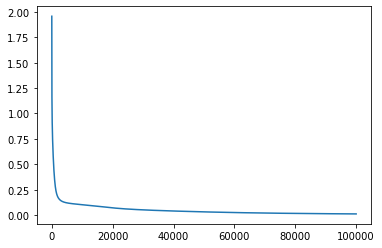

In [ ]:
plt.plot(errors)

## Testing the network accuracy:

### train data

In [ ]:
y_train_pred = np.argmax(a2_train, axis=1)
y_train_pred

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
train_pred = (y_train == y_train_pred)

In [ ]:
train_accuracy = np.sum(train_pred)/ len(train_pred)
train_accuracy

1.0

### test data

In [ ]:
print(w1.shape)
print(b1.shape)

(10, 4)
(1, 10)


In [ ]:
a1_test = activation(x_test, w1, b1)
a2_test = activation(a1_test, w2, b2)

In [ ]:
y_test_pred = np.argmax(a2_test, axis=1)
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
test_pred = (y_test == y_test_pred)

In [ ]:
test_accuracy = np.sum(test_pred)/ len(test_pred)
test_accuracy

0.9555555555555556